<a href="https://colab.research.google.com/github/JAYASHREEUSHA/Basicplots/blob/main/Machine_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn tensorflow matplotlib pandas

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = pd.read_csv('data.csv')  # Update with your dataset path
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels
print(data.head)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



<bound method NDFrame.head of       Unnamed: 0          x          y          z  Class
0              0 -23.032253  50.234551 -25.562532      1
1              1  18.976180  21.782915  -6.294883      0
2              2 -14.525201  26.476835 -32.339567      1
3              3  20.569109  47.558544  -2.286401      0
4              4  -9.901939   0.570729 -34.539749      1
...          ...        ...        ...        ...    ...
1495        1495 -26.985187  19.259016 -20.289892      1
1496        1496  24.962629  22.323806  37.982614      1
1497        1497   5.215241  15.059526 -36.971041      1
1498        1498  39.242870  24.846095  19.123095      1
1499        1499  10.758203  69.213998 -14.374403      0

[1500 rows x 5 columns]>


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [ ]:
# Polynomial Kernel SVM
svm_model = SVC(kernel='poly', random_state=42)
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_



In [ ]:
# Calculate class weights for MLP
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))



In [ ]:
# Multi-Layer Perceptron
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=50, batch_size=32, verbose=0, class_weight=class_weights_dict)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Predictions
y_pred_svm = best_svm_model.predict(X_test)
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


SVM Confusion Matrix:
[[141   5]
 [ 21 133]]


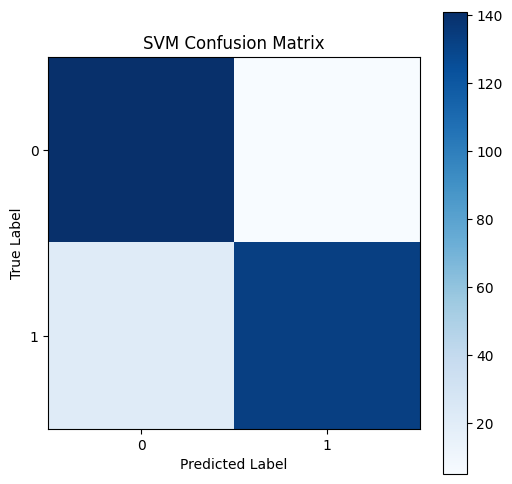

In [ ]:
# SVM Confusion Matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(confusion_matrix_svm)

# Plot SVM Confusion Matrix
plt.figure(figsize=(6, 6))
plt.title("SVM Confusion Matrix")
plt.imshow(confusion_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

MLP Confusion Matrix:
[[146   0]
 [  1 153]]


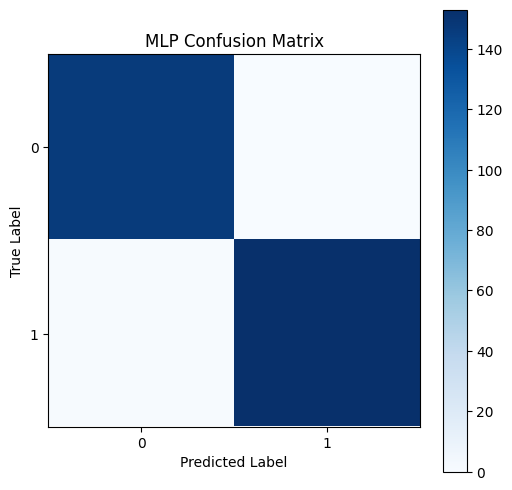

In [ ]:
# MLP Confusion Matrix
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Confusion Matrix:")
print(confusion_matrix_mlp)

# Plot MLP Confusion Matrix
plt.figure(figsize=(6, 6))
plt.title("MLP Confusion Matrix")
plt.imshow(confusion_matrix_mlp, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:

# Performance Metrics
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       146
           1       0.96      0.86      0.91       154

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       146
           1       1.00      0.99      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


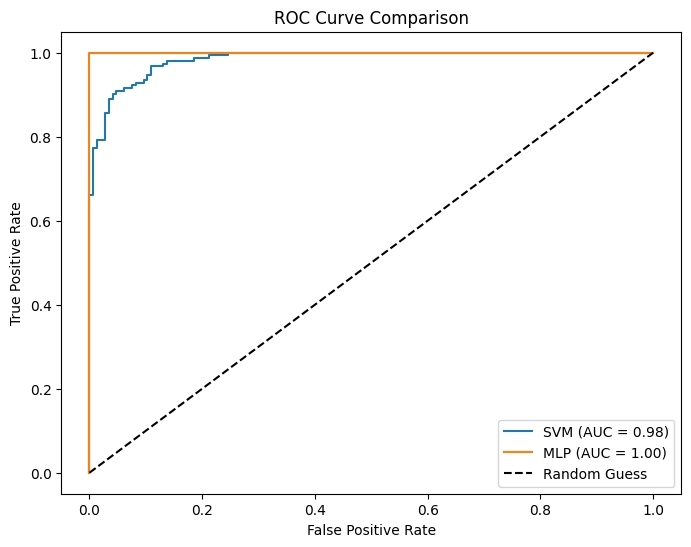

In [ ]:
# ROC Curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict(X_test).ravel())
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()



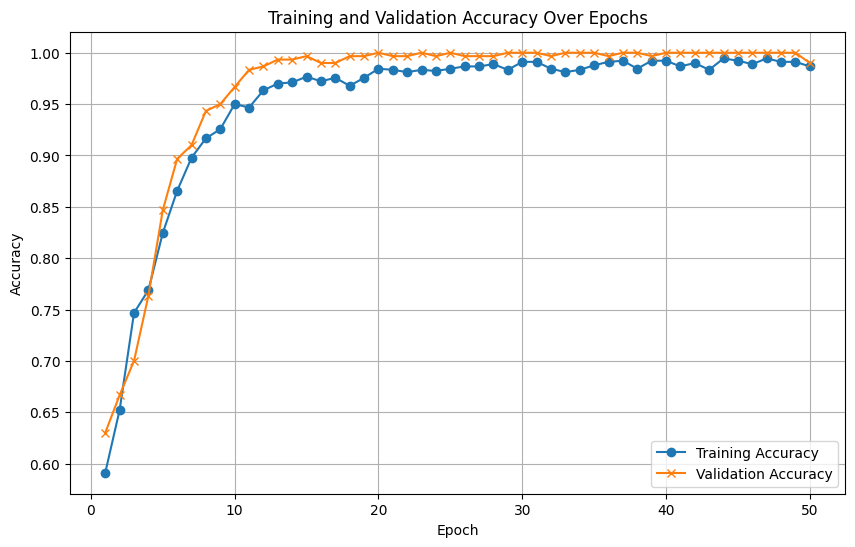

In [ ]:
# Plot training and testing accuracy over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Access training and validation accuracy from the history object
plt.plot(range(1, 51), history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(range(1, 51), history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')  # Changed title to reflect the data plotted
plt.legend()
plt.grid()
plt.show()

   Unnamed: 0          x          y          z  Class
0           0 -23.032253  50.234551 -25.562532      1
1           1  18.976180  21.782915  -6.294883      0
2           2 -14.525201  26.476835 -32.339567      1
3           3  20.569109  47.558544  -2.286401      0
4           4  -9.901939   0.570729 -34.539749      1
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4992 - loss: 0.6856 - val_accuracy: 0.6267 - val_loss: 0.6508
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.6255 - val_accuracy: 0.6633 - val_loss: 0.6068
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7409 - loss: 0.5711 - val_accuracy: 0.6700 - val_loss: 0.5681
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.5250 - val_accuracy: 0.7067 - val_loss: 0.5154
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.4791 - val_accuracy: 0.7833 - val_loss: 0.4586
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.4205 - val_accuracy: 0.8567 - val_loss: 0.4008
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.3698 - val_accuracy: 0.8967 - val_loss: 0.3428
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8840 - loss: 0.3373 - val_accuracy: 0.9167 - val_loss: 0.2879
Epo

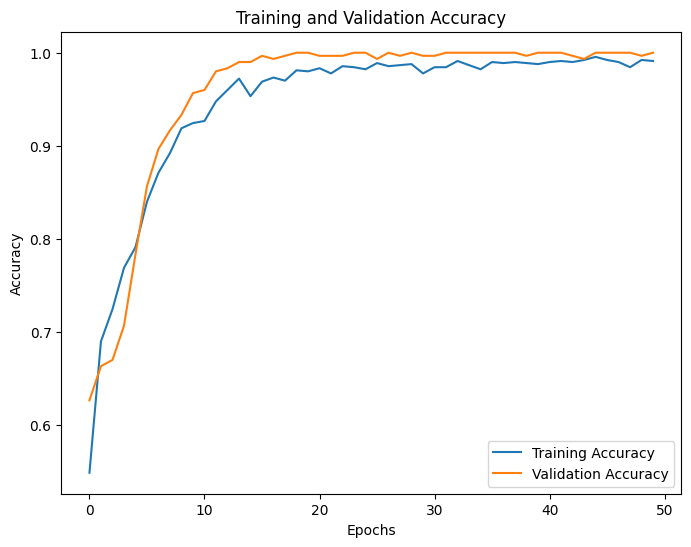

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
SVM Confusion Matrix:
[[141   5]
 [ 21 133]]


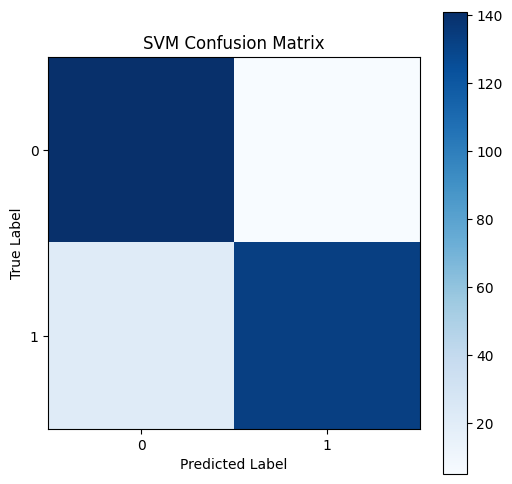

MLP Confusion Matrix:
[[146   0]
 [  0 154]]


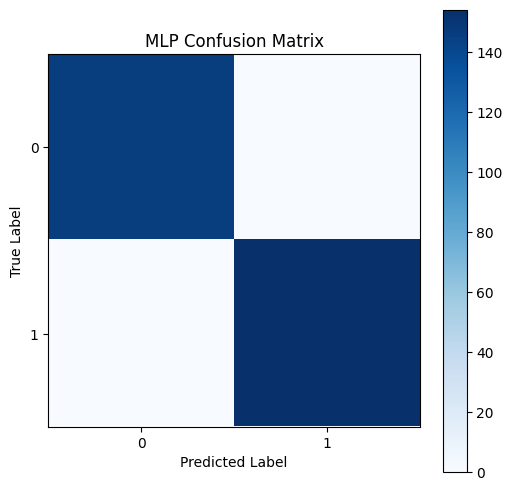

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       146
           1       0.96      0.86      0.91       154

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


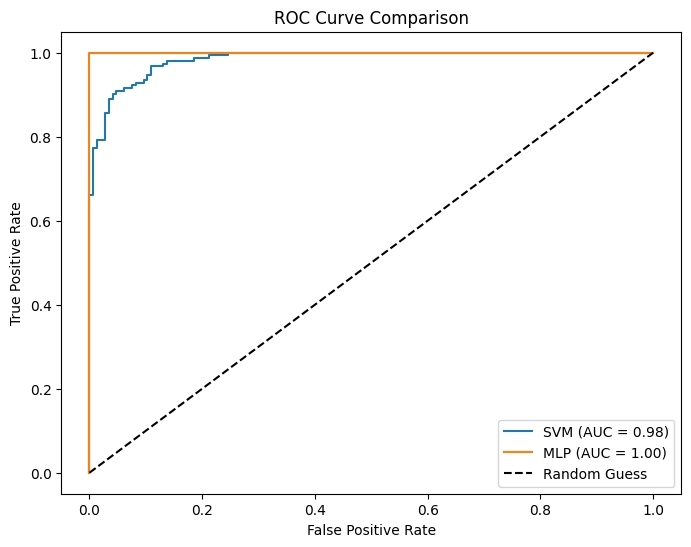

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('data.csv')  # Update with your dataset path
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels
print(data.head())

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Polynomial Kernel SVM
svm_model = SVC(kernel='poly', random_state=42, probability=True)
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_

# Calculate class weights for MLP
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Multi-Layer Perceptron
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=50, batch_size=32, verbose=1, class_weight=class_weights_dict)

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predictions
y_pred_svm = best_svm_model.predict(X_test)
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)

# SVM Confusion Matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(confusion_matrix_svm)

# Plot SVM Confusion Matrix
plt.figure(figsize=(6, 6))
plt.title("SVM Confusion Matrix")
plt.imshow(confusion_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# MLP Confusion Matrix
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Confusion Matrix:")
print(confusion_matrix_mlp)

# Plot MLP Confusion Matrix
plt.figure(figsize=(6, 6))
plt.title("MLP Confusion Matrix")
plt.imshow(confusion_matrix_mlp, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Performance Metrics
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# ROC Curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict(X_test).ravel())
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
